In [532]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import plotly.express as px

from ydata_profiling import ProfileReport as pr
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

In [533]:
def model_report(Y_test, Y_pred_rf):
    print("classification_report")
    print(classification_report(Y_test, Y_pred_rf))
    print("confusion_matrix")
    print(confusion_matrix(Y_test, Y_pred_rf))
    print("accuracy_score")
    print(accuracy_score(Y_test, Y_pred_rf))
    # print("roc_curve")
    # print(roc_curve(Y_test, Y_pred_rf))
    # print("precision_score")
    # print(precision_score(Y_test, Y_pred_rf))
    # print("recall_score")
    # print(recall_score(Y_test, Y_pred_rf))
    # print("f1_score")   
    # print(f1_score(Y_test, Y_pred_rf))
    precision, recall, fscore, support = precision_recall_fscore_support(Y_test, Y_pred_rf, average='weighted', zero_division=1)
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"fscore: {fscore}")
    print(f"support: {support}")

In [534]:
# list possible features of the column of the dataframe
def get_possible_features(df, column):
    return df[column].unique()

In [535]:
import numpy as np
def ReturnHighCardinalityColumns(df):
    high_cardinality_cols = []
    for col in df.columns:
        if len(np.unique(df[col])) == len(df[col]):
            high_cardinality_cols.append(col)
    print(high_cardinality_cols)

In [536]:
def model_confusion_matrix_heatmap(Y_test, Y_pred_rf):
    conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
    sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest Confusion Matrix')
    plt.show()

In [537]:
# remove outlier based on every column
import numpy as np
def IQR(df):
    Q1 = df.quantile(0.25) 
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + IQR*1.5
    lower_fence = Q1 - IQR*1.5
    return upper_fence,lower_fence
def no_outlier(df):
    upper_fence, lower_fence = IQR(df)
    ddf=df[(df>lower_fence)&(df<upper_fence)]
    return ddf

In [538]:
import matplotlib.pyplot as plt
import seaborn as sns

def boxplot(df):
    # Create subplots with multiple boxplots
    fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(30, 6))

    # Iterate through columns and draw horizontal boxplots
    for i, column in enumerate(df.columns):
        sns.boxplot(y=column, data=df, ax=axes[i], orient='h')  # Use orient='h'
        axes[i].set_title(f'{column}')
        
    plt.subplots_adjust(wspace=3)  # Adjust horizontal spacing between subplots

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


In [539]:
data = pd.read_csv("./old_data.csv")

In [540]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The code drops columns from a DataFrame if they have either a constant value for all rows or unique values for each row, aiming to simplify the dataset by removing less informative columns.

In [541]:
for col in data.columns:
    if len(get_possible_features(data,col)) == 1 or len(get_possible_features(data,col)) == data.shape[0]:
        data = data.drop(col, axis=1)

The code categorizes DataFrame columns into 'object_col' for object-type columns, 'object_col' for columns with fewer than 10 unique features, and 'numerical_list' for other columns.

In [542]:
object_col = []
numerical_list = []
for col in data.columns:
    if data[col].dtype == 'object':
        object_col.append(col)
    elif get_possible_features(data, col).size < 10:
        object_col.append(col)
    else:
        numerical_list.append(col)

In [543]:
data[numerical_list].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.00,40.0


visualize the distribution of the numerical features


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning:

Horizontal orientation ignored with only `y` specified.

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning:

Horizontal orientation ignored with only `y` specified.

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future ver

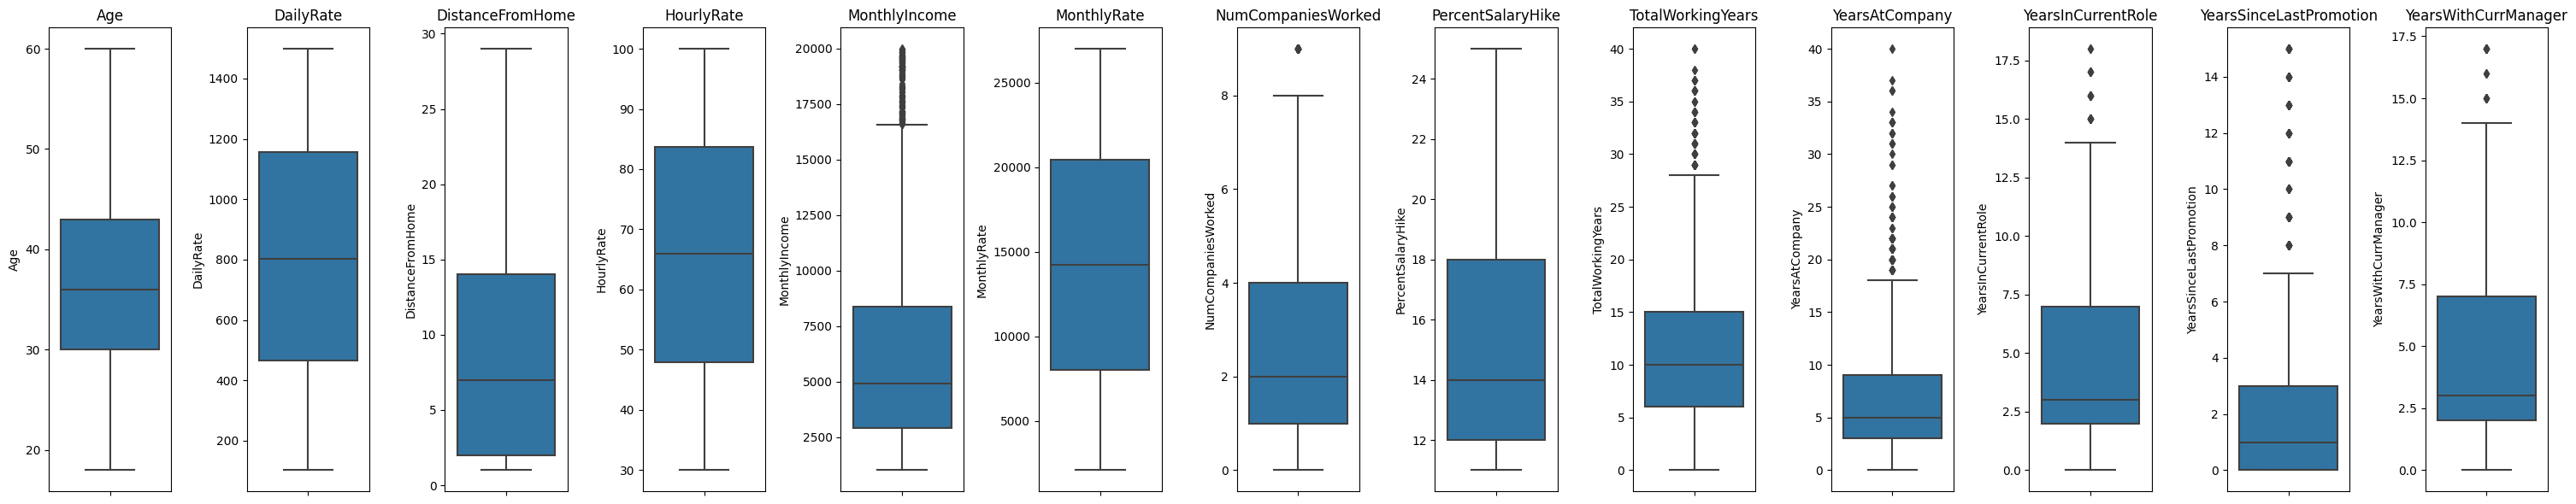

In [399]:
boxplot(data[numerical_list])

In [544]:
data_num = no_outlier(data[numerical_list])
data_num = data_num.fillna(data_num.max())
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6359.875510,4348.612077,1009.0,2911.0,4919.0,8379.00,16555.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.657823,2.414062,0.0,1.0,2.0,4.00,8.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.081633,7.253280,0.0,6.0,10.0,15.00,28.0
YearsAtCompany,1470.0,6.538095,4.812295,0.0,3.0,5.0,9.00,17.0


In [545]:
# remove numerical columns and concat with data_num
data = data.drop(numerical_list, axis=1)
data = pd.concat([data, data_num], axis=1)
data

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,...,94,5993.0,19479,8.0,11,8.0,6.0,4.0,0.0,5.0
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,...,61,5130.0,24907,1.0,23,10.0,10.0,7.0,1.0,7.0
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,...,92,2090.0,2396,6.0,15,7.0,0.0,0.0,0.0,0.0
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,...,56,2909.0,23159,1.0,11,8.0,8.0,7.0,3.0,0.0
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,...,40,3468.0,16632,8.0,12,6.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,2,Medical,3,Male,4,2,Laboratory Technician,...,41,2571.0,12290,4.0,17,17.0,5.0,2.0,0.0,3.0
1466,No,Travel_Rarely,Research & Development,1,Medical,4,Male,2,3,Healthcare Representative,...,42,9991.0,21457,4.0,15,9.0,7.0,7.0,1.0,7.0
1467,No,Travel_Rarely,Research & Development,3,Life Sciences,2,Male,4,2,Manufacturing Director,...,87,6142.0,5174,1.0,20,6.0,6.0,2.0,0.0,3.0
1468,No,Travel_Frequently,Sales,3,Medical,4,Male,2,2,Sales Executive,...,63,5390.0,13243,2.0,14,17.0,9.0,6.0,0.0,8.0


Standard Scale DailyRate, HourlyRate, MonthlyIncome, MonthlyRate

In [546]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# data[["DailyRate","HourlyRate","MonthlyIncome","MonthlyRate"]] = scaler.fit_transform(data[["DailyRate","HourlyRate","MonthlyIncome","MonthlyRate"]])
data[numerical_list] = scaler.fit_transform(data[numerical_list])
data[numerical_list].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,-3.504377e-17,1.00034,-2.072192,-0.758170,-0.101159,0.665354,2.526886
DailyRate,1470.0,5.075305e-17,1.00034,-1.736576,-0.836662,-0.001204,0.878877,1.726730
DistanceFromHome,1470.0,4.350262e-17,1.00034,-1.010909,-0.887515,-0.270544,0.593216,2.444129
HourlyRate,1470.0,1.691768e-16,1.00034,-1.766079,-0.880361,0.005356,0.878771,1.678377
MonthlyIncome,1470.0,4.833624e-17,1.00034,-1.230898,-0.793368,-0.331454,0.464473,2.345253
MonthlyRate,1470.0,3.021015e-17,1.00034,-1.717284,-0.880644,-0.010906,0.864101,1.782888
NumCompaniesWorked,1470.0,9.606828e-17,1.00034,-1.101350,-0.686970,-0.272589,0.556172,2.213694
PercentSalaryHike,1470.0,2.271803e-16,1.00034,-1.150554,-0.877232,-0.330589,0.762698,2.675949
TotalWorkingYears,1470.0,1.002977e-16,1.00034,-1.528330,-0.700836,-0.149174,0.540404,2.333306
YearsAtCompany,1470.0,4.833624e-17,1.00034,-1.359086,-0.735470,-0.319727,0.511761,2.174735


Separate ordinal and categorical

In [547]:
for col in data[object_col].columns:
    print(f" {col} : {get_possible_features(data,col)}")

 Attrition : ['Yes' 'No']
 BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
 Department : ['Sales' 'Research & Development' 'Human Resources']
 Education : [2 1 4 3 5]
 EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
 EnvironmentSatisfaction : [2 3 4 1]
 Gender : ['Female' 'Male']
 JobInvolvement : [3 2 4 1]
 JobLevel : [2 1 3 4 5]
 JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
 JobSatisfaction : [4 2 3 1]
 MaritalStatus : ['Single' 'Married' 'Divorced']
 OverTime : ['Yes' 'No']
 PerformanceRating : [3 4]
 RelationshipSatisfaction : [1 4 2 3]
 StockOptionLevel : [0 1 3 2]
 TrainingTimesLastYear : [0 3 2 5 1 4 6]
 WorkLifeBalance : [1 3 2 4]


In [548]:
ordinal_list = ['Attrition','BusinessTravel','Education', 'EnvironmentSatisfaction', 'JobInvolvement','JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance','StockOptionLevel','TrainingTimesLastYear']
categorical_col = [item for item in object_col if item not in ordinal_list]
print(f"ordinal_list {len(ordinal_list)}: {ordinal_list}")
print(f"categorical_col {len(categorical_col)}: {categorical_col}")
print(f"numerical_list {len(numerical_list)}: {numerical_list}")

ordinal_list 12: ['Attrition', 'BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel', 'TrainingTimesLastYear']
categorical_col 6: ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_list 13: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [549]:
print("categorical_col : ")
for col in data[categorical_col].columns:
    print(f" {col} : {get_possible_features(data,col)}")

ordinal_dict = {}
print("\nordinal_list : ")
for col in data[ordinal_list].columns:
    print(f" {col} : {get_possible_features(data,col)}")
    ordinal_dict[col] = get_possible_features(data,col)

categorical_col : 
 Department : ['Sales' 'Research & Development' 'Human Resources']
 EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
 Gender : ['Female' 'Male']
 JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
 MaritalStatus : ['Single' 'Married' 'Divorced']
 OverTime : ['Yes' 'No']

ordinal_list : 
 Attrition : ['Yes' 'No']
 BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
 Education : [2 1 4 3 5]
 EnvironmentSatisfaction : [2 3 4 1]
 JobInvolvement : [3 2 4 1]
 JobLevel : [2 1 3 4 5]
 JobSatisfaction : [4 2 3 1]
 PerformanceRating : [3 4]
 RelationshipSatisfaction : [1 4 2 3]
 WorkLifeBalance : [1 3 2 4]
 StockOptionLevel : [0 1 3 2]
 TrainingTimesLastYear : [0 3 2 5 1 4 6]


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



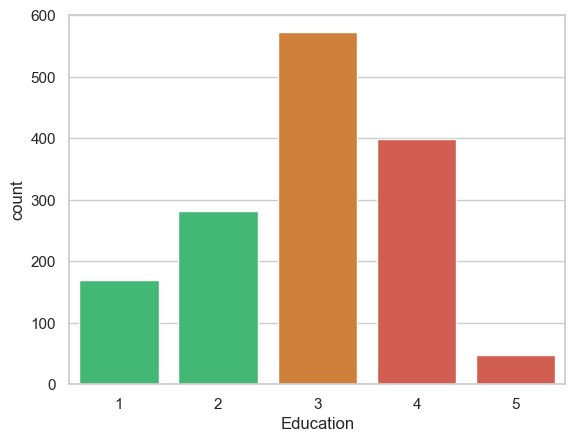

In [550]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Education' column has categories like 'High School', 'Bachelor', 'Master', etc.
education_colors = {1: '#2ecc71',    # Blue
                   2: '#2ecc71',        # Green
                   3: '#e67e22',          # Orange
                   4: '#e74c3c',             # Red
                   5: '#e74c3c'}           # Purple

sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Assuming 'data' is your DataFrame
sns.countplot(x='Education', data=data, palette=education_colors)

plt.show()


create ordinal_dict for ordinal encoding

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



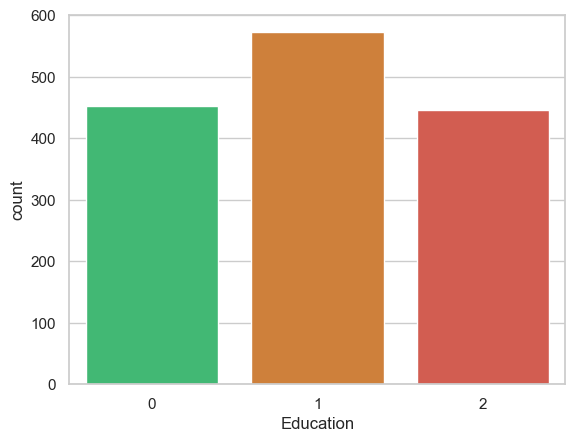

In [551]:
mapping = []

for col, values in ordinal_dict.items():
    if col == "BusinessTravel":  # Check if values are strings (categorical)
        col_mapping = {'col': col, 'mapping': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}}
    elif col == "Education":
        # col_mapping = {'col': col, 'mapping': {value: 0 if value < 4 else 1 for _, value in enumerate(np.sort(values))}}
        col_mapping = {'col': col, 'mapping': {value: 0 if value < 3 else (1 if value < 4 else 2) for _, value in enumerate(np.sort(values))}}
    else:  # Values are integers (already in desired order)
        col_mapping = {'col': col, 'mapping': {value: index for index, value in enumerate(np.sort(values))}}
    mapping.append(col_mapping)

# Create an OrdinalEncoder with specified mappings
encoder = ce.OrdinalEncoder(cols=ordinal_list, mapping=mapping)
education_colors = {0: '#2ecc71',    # Blue
                   1: '#e67e22',        # Green
                   2: '#e74c3c'}
# plot the bar chart of the Education  columns
sns.countplot(x='Education', data=encoder.fit_transform(data), palette=education_colors)
plt.show()

In [552]:
data = encoder.fit_transform(data)

In [553]:
data.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,Sales,0,Life Sciences,1,Female,2,1,Sales Executive,...,1.383138,-0.084395,0.726020,2.213694,-1.150554,-0.425005,-0.111855,-0.056788,-0.786796,0.256181
1,0,2,Research & Development,0,Life Sciences,2,Male,1,1,Research Scientist,...,-0.240677,-0.282916,1.488876,-0.686970,2.129306,-0.149174,0.719632,0.792138,-0.369706,0.827197
2,1,1,Research & Development,0,Other,3,Male,1,0,Laboratory Technician,...,1.284725,-0.982228,-1.674841,1.384933,-0.057267,-0.562921,-1.359086,-1.188688,-0.786796,-1.171361
3,0,2,Research & Development,2,Life Sciences,3,Female,2,0,Research Scientist,...,-0.486709,-0.793828,1.243211,-0.686970,-1.150554,-0.425005,0.303889,0.792138,0.464473,-1.171361
4,0,1,Research & Development,0,Medical,0,Male,2,0,Laboratory Technician,...,-1.274014,-0.665237,0.325900,2.213694,-0.877232,-0.700836,-0.943342,-0.622738,0.047384,-0.600344


In [554]:
# use one hot encoding for categorical
encoder = ce.OneHotEncoder(cols=categorical_col)
data = encoder.fit_transform(data)

In [613]:
X = data.drop(columns=['Attrition'])
Y = data['Attrition']

In [614]:
X.head()

,BusinessTravel,Department_1,Department_2,Department_3,Education,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,...,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,0,0,0,1,0,0,0,0,...,1.383138,-0.084395,0.726020,2.213694,-1.150554,-0.425005,-0.111855,-0.056788,-0.786796,0.256181
1,2,0,1,0,0,1,0,0,0,0,...,-0.240677,-0.282916,1.488876,-0.686970,2.129306,-0.149174,0.719632,0.792138,-0.369706,0.827197
2,1,0,1,0,0,0,1,0,0,0,...,1.284725,-0.982228,-1.674841,1.384933,-0.057267,-0.562921,-1.359086,-1.188688,-0.786796,-1.171361
3,2,0,1,0,2,1,0,0,0,0,...,-0.486709,-0.793828,1.243211,-0.686970,-1.150554,-0.425005,0.303889,0.792138,0.464473,-1.171361
4,1,0,1,0,0,0,0,1,0,0,...,-1.274014,-0.665237,0.325900,2.213694,-0.877232,-0.700836,-0.943342,-0.622738,0.047384,-0.600344


In [582]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [583]:
# use StratifiedKFold
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
svc = SVC()
svc_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
knc = KNeighborsClassifier()
xgb = XGBClassifier()
# list of models
models = [gbc, rfc, svc, svc_rbf, knc, xgb]
models_acc = []
models_precision_score = []
models_recall_score = []
models_f1_score = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for model in models:
    acc_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        acc_list.append(accuracy_score(Y_test, y_pred))
        precision_score_list.append(precision_score(Y_test, y_pred, average='weighted', zero_division=1))
        recall_score_list.append(recall_score(Y_test, y_pred, average='weighted', zero_division=1))
        f1_score_list.append(f1_score(Y_test, y_pred, average='weighted', zero_division=1))
    models_acc.append(np.mean(acc_list).__round__(3))
    models_precision_score.append(np.mean(precision_score_list).__round__(3))
    models_recall_score.append(np.mean(recall_score_list).__round__(3))
    models_f1_score.append(np.mean(f1_score_list).__round__(3))


In [584]:
modellist = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'SVC_rbf', 'KNeighborsClassifier', 'XGBClassifier']
models_df = pd.DataFrame({'model': modellist, 'acc': models_acc, 'precision_score': models_precision_score, 'recall_score': models_recall_score, 'f1_score': models_f1_score})
models_df

,model,acc,precision_score,recall_score,f1_score
0,GradientBoostingClassifier,0.397,0.397,0.397,0.391
1,RandomForestClassifier,0.407,0.402,0.407,0.393
2,SVC,0.392,0.390,0.392,0.362
3,SVC_rbf,0.395,0.395,0.395,0.361
4,KNeighborsClassifier,0.347,0.347,0.347,0.335
5,XGBClassifier,0.397,0.397,0.397,0.396


In [565]:
models_df.to_csv('models_df_attrition.csv', index=False)

In [615]:
# RandomForestClassifier
from sklearn.inspection import permutation_importance
fimp = pd.DataFrame({'feature': X.columns})
for i in range(5):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    feature_importance = pd.DataFrame()
    rfc = RandomForestClassifier()
    iter = 0
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        rfc.fit(X_train, Y_train)
        y_pred = rfc.predict(X_test)
        feature_importance = pd.concat([feature_importance, pd.DataFrame({f'importance_{iter}': permutation_importance(rfc, X_test, Y_test)['importances_mean']})], axis=1)
        iter += 1
    feature_importance['sum'] = feature_importance.sum(axis=1)/10
    feature_importance['sum'].sort_values(ascending=False)
    fimp = pd.concat([fimp, feature_importance['sum']], axis=1)

In [616]:
fimp.columns = ['feature', 'importance_1', 'importance_2', 'importance_3', 'importance_4', 'importance_5']
# rename the columns
fimp

,feature,importance_1,importance_2,importance_3,importance_4,importance_5
0,BusinessTravel,-0.000272,1.360544e-04,9.523810e-04,-5.442177e-04,-1.360544e-04
1,Department_1,0.001633,6.802721e-04,1.360544e-03,-1.360544e-04,6.802721e-04
2,Department_2,0.000680,2.721088e-04,1.496599e-03,-9.523810e-04,2.585034e-03
3,Department_3,0.000000,-4.081633e-04,0.000000e+00,0.000000e+00,-2.721088e-04
4,Education,-0.000136,9.523810e-04,-6.802721e-04,-1.632653e-03,-1.632653e-03
5,EducationField_1,0.001088,1.360544e-04,8.673617e-20,-1.632653e-03,-1.224490e-03
6,EducationField_2,0.000000,-2.721088e-04,0.000000e+00,-1.360544e-04,2.721088e-04
7,EducationField_3,-0.000544,-2.255141e-18,1.088435e-03,-1.496599e-03,1.360544e-03
8,EducationField_4,0.002449,8.163265e-04,-4.081633e-04,-2.721088e-04,1.088435e-03
9,EducationField_5,-0.000272,1.360544e-04,1.360544e-04,-1.360544e-04,1.360544e-04


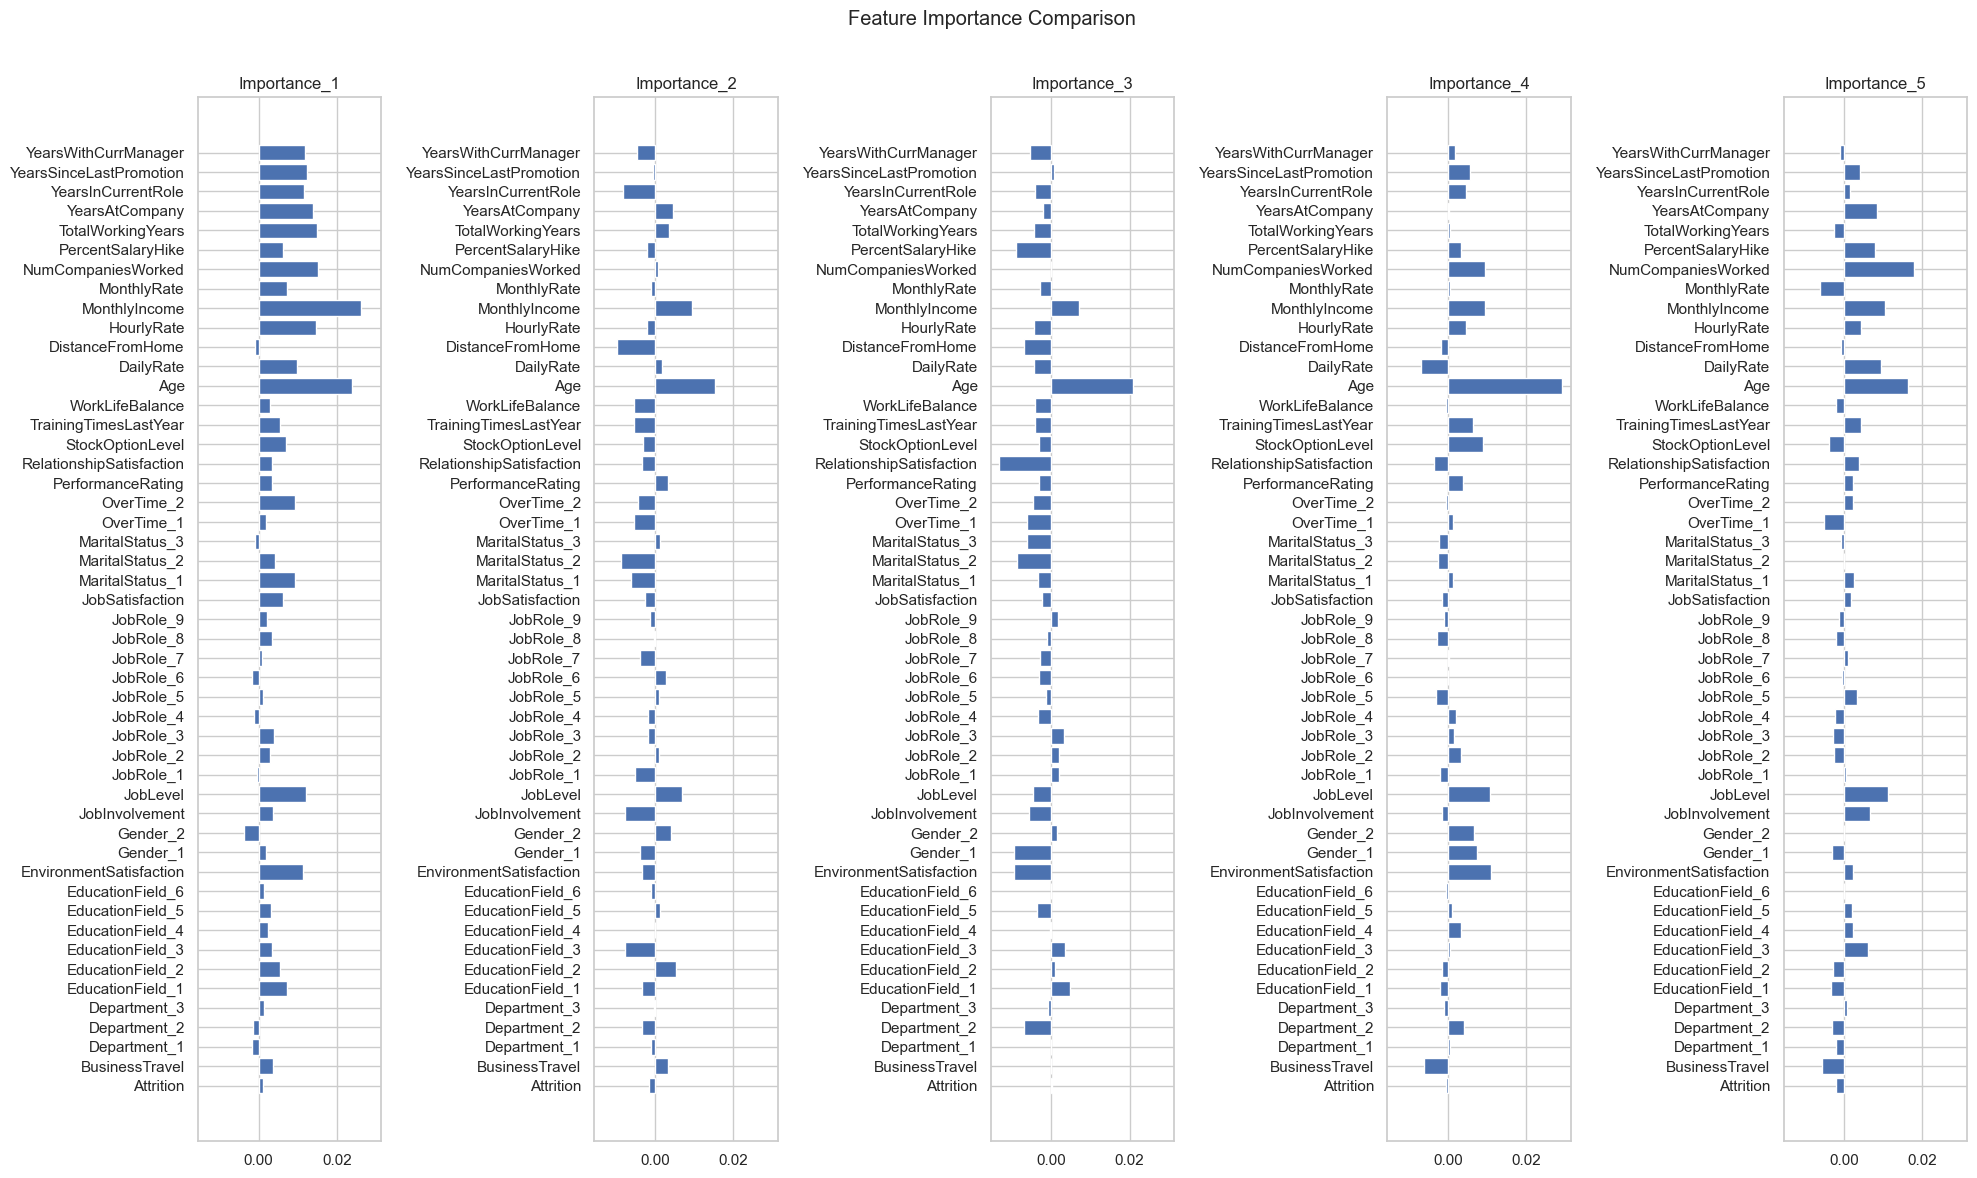

In [612]:
# this is predict Education

fig, axes = plt.subplots(1, 5, figsize=(20, 12), sharex=True)

for i in range(1, 6):
    axes[i-1].barh(fimp['feature'], fimp[f'importance_{i}'])
    axes[i-1].set_title(f'Importance_{i}')
    

# Add labels and adjust layout
fig.suptitle('Feature Importance Comparison')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the top margin for the suptitle

# Show the plot
plt.show()

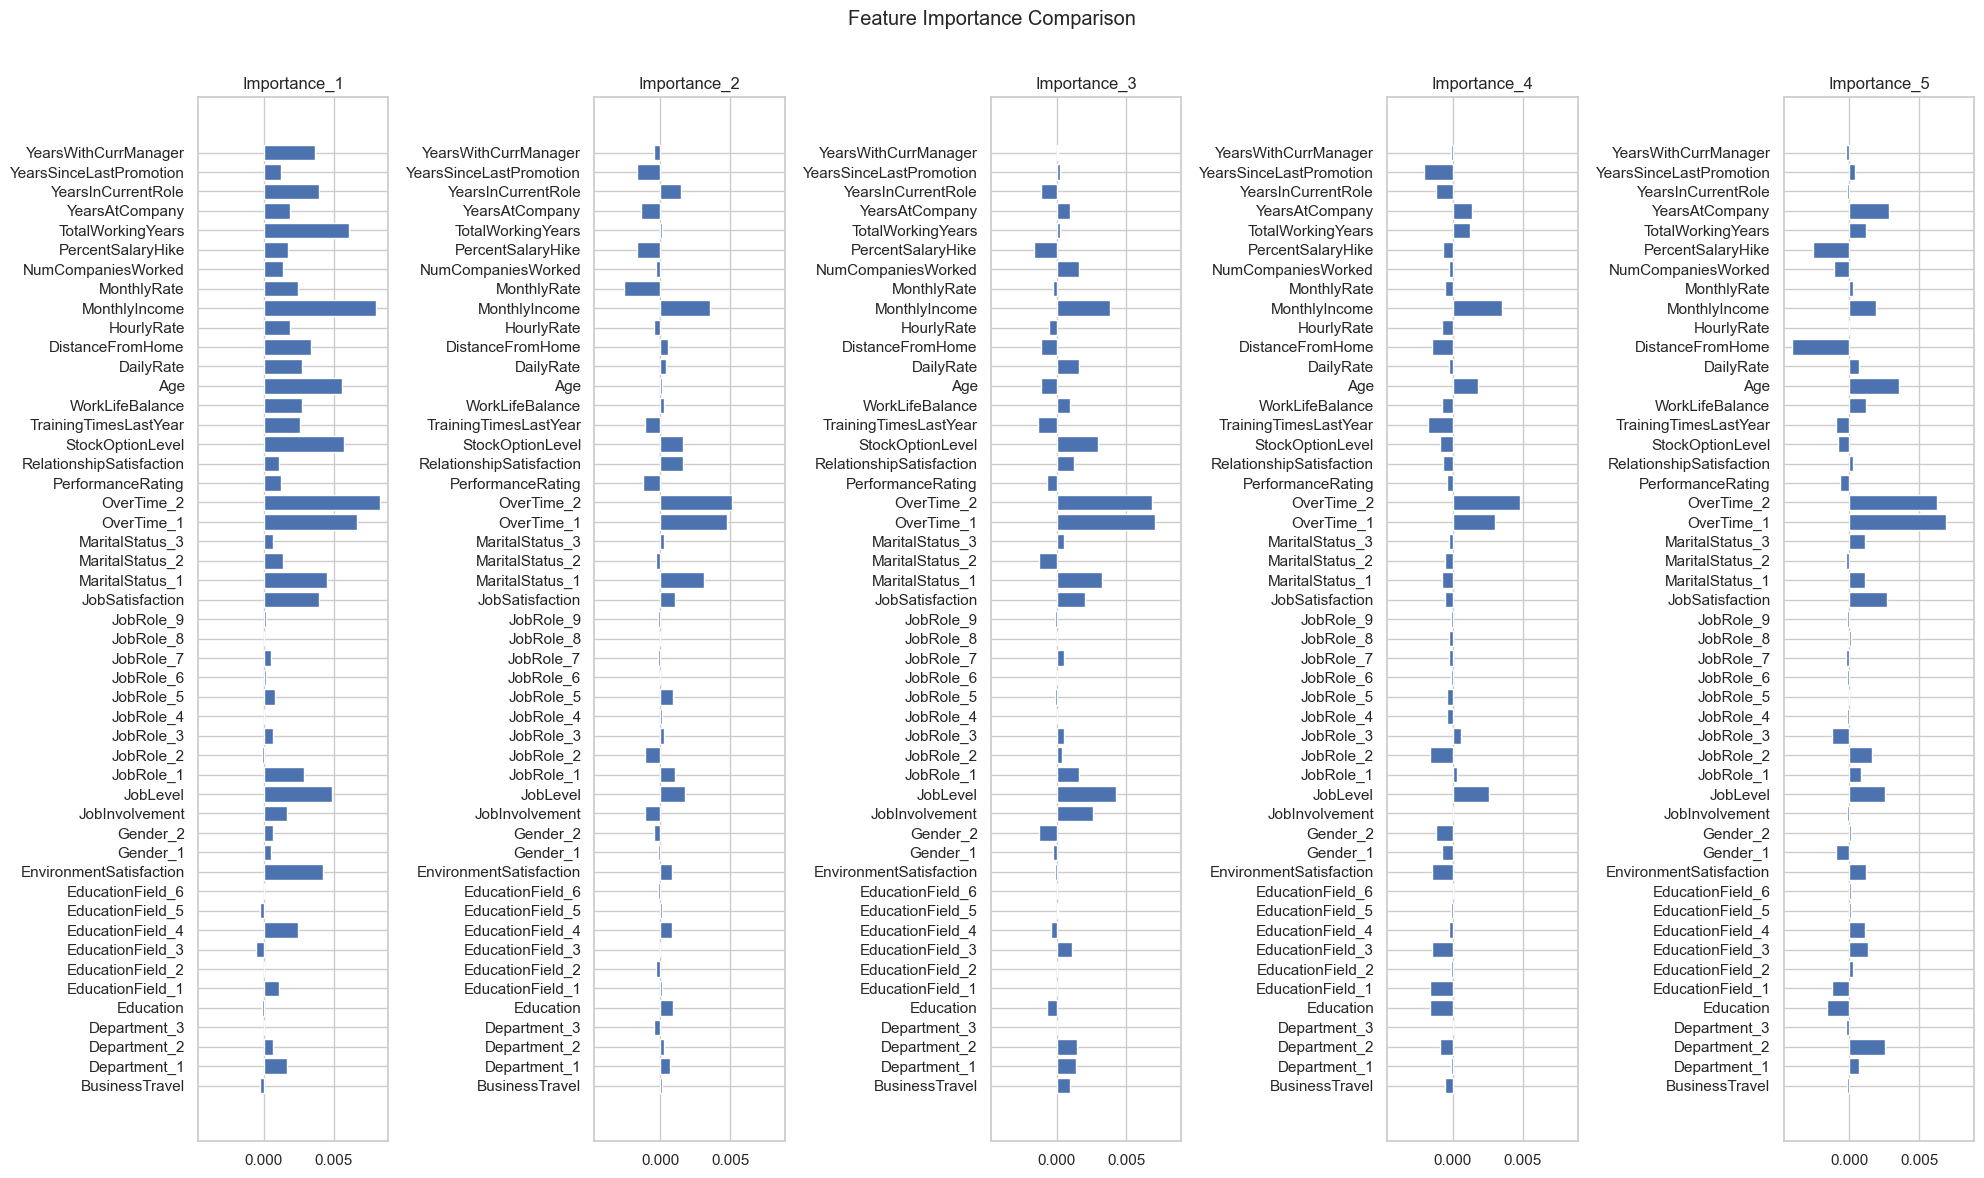

In [617]:
# this is predict Attrition

fig, axes = plt.subplots(1, 5, figsize=(20, 12), sharex=True)

for i in range(1, 6):
    axes[i-1].barh(fimp['feature'], fimp[f'importance_{i}'])
    axes[i-1].set_title(f'Importance_{i}')
    

# Add labels and adjust layout
fig.suptitle('Feature Importance Comparison')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the top margin for the suptitle

# Show the plot
plt.show()

### Plot training data in 3D

In [576]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3', color=Y,
                    labels={'principal component 1': 'Principal Component 1', 'principal component 2': 'Principal Component 2',
                            'principal component 3': 'Principal Component 3'}, title='3 component PCA')
fig.show()
# save the figure as html file
fig.write_html("3 component PCA.html")

In [432]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(X)
tsneDf = pd.DataFrame(data = tsne_results, columns = ['tsne component 1', 'tsne component 2', 'tsne component 3'])
# draw 3d scatter plot
fig = px.scatter_3d(tsneDf, x='tsne component 1', y='tsne component 2', z='tsne component 3', color=Y,
                    labels={'tsne component 1': 'tsne Component 1', 'tsne component 2': 'tsne Component 2',
                            'tsne component 3': 'tsne Component 3'}, title='3 component TSNE')
fig.show()
# save the figure as html file
fig.write_html("3 component TSNE.html")